In [62]:
import numpy as np
import os
from imageio.v2 import imread
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.regularizers import l2

# Reading in images

In [6]:
root = 'datasets/Images'
files = os.listdir(root)
files[:5]

['n02097658-silky_terrier',
 'n02092002-Scottish_deerhound',
 'n02099849-Chesapeake_Bay_retriever',
 'n02091244-Ibizan_hound',
 'n02095314-wire-haired_fox_terrier']

In [63]:
images = []
for file in files:
    if file[0] == '.': # to get rid of hidden files
        continue
    dog_type = file.split('-')[1]
    dogs = os.listdir(root +'/' +file)
    dogs = [(root+'/'+file+'/'+dog, dog_type) for dog in dogs if dog[0]!='.']
    images += dogs

In [65]:
images[:3]

[('datasets/Images/n02097658-silky_terrier/n02097658_26.jpg', 'silky_terrier'),
 ('datasets/Images/n02097658-silky_terrier/n02097658_4869.jpg',
  'silky_terrier'),
 ('datasets/Images/n02097658-silky_terrier/n02097658_595.jpg',
  'silky_terrier')]

In [66]:
test_image = images[4][0]
vectorized_picture = np.array(imread(test_image))
vectorized_picture.shape

(333, 500, 3)

In [67]:
heights = []
widths = []
colors = []
for image in images:
    im = image[0]
    # if im.split('/')[-1][0] == '.':
    #     continue
    vectorized_picture = np.array(imread(im))
    heights.append(vectorized_picture.shape[0])
    widths.append(vectorized_picture.shape[1])
    colors.append(vectorized_picture.shape[2])
    

## Checking ranges of values of heights/widths and verifying all color images (3) values

In [68]:
min(heights), np.mean(heights), max(heights)

(100, 385.8612244897959, 2562)

In [69]:
min(widths), np.mean(widths), max(widths)

(97, 442.5318756073858, 3264)

In [70]:
min(colors), max(colors)

(3, 4)

In [71]:
[1 for color in colors if color==4 ] # one image with transparency data

[1]

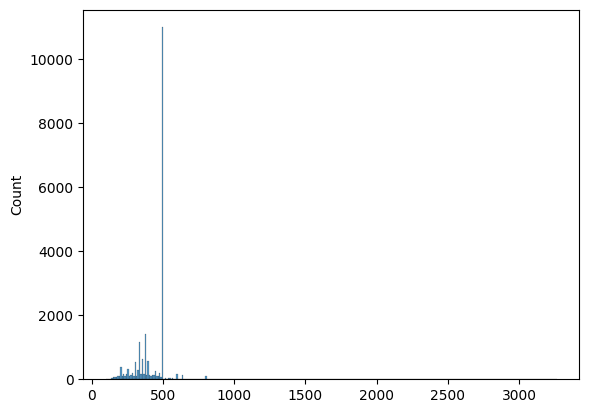

In [73]:
sns.histplot(widths);

In [ ]:
dog_df = pd.DataFrame({'image_url': 